<a href="https://colab.research.google.com/github/9characters/Artificial-Intelligence/blob/master/Regression%20Annual%20Discharge%20San%20Antonio%20River.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import plotly.graph_objects as go
# To install the package: pip install plotly
# P.S. Don't run the line if interactive plot below is not required

# Reading and processing the dataset

In [3]:
dataset = pd.read_csv("Q_Day_San_Antonio_River.csv", skiprows=37, names=["Date", "Time", "Value"], delimiter=";", usecols=[0,2])

In [4]:
# Removing the rows with Values: -999.000
drop_indices = dataset[dataset['Value'] == -999.000].index
dataset.drop(drop_indices, inplace = True)

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

#Linear Regression Analysis with respect to Mean Annual Discharge (MQ)

In [6]:
# Processing the dataset with respect to MQ
MQ = dataset.resample('Y', on='Date').mean().reset_index()
MQ['Date'] = pd.DatetimeIndex(MQ['Date']).year
MQ.rename(columns = {"Date": "Year"}, inplace = True)
MQ = MQ.dropna()

In [7]:
# Splitting into dependent(y) and Independent(X) variables
X, y = MQ.iloc[:,0].values, MQ.iloc[:,1].values
X = np.expand_dims(X, axis=1)

In [8]:
# Using the scikit-learn Linear Regression model to predict the values
MQ_LR_model = LinearRegression()
MQ_history = MQ_LR_model.fit(X, y)
y_pred = MQ_LR_model.predict(X)

Coefficient: 0.192
Intercept: -357.11


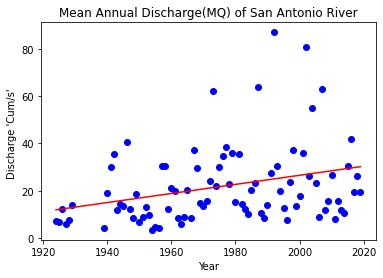

In [9]:
# Display Coefficient and Intercept
print(f"Coefficient: {round(MQ_history.coef_[0],3)}")
print(f"Intercept: {round(MQ_history.intercept_,3)}")

# Scatter-Line Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Mean Annual Discharge(MQ) of San Antonio River")
plt.xlabel("Year")
plt.ylabel("Discharge 'Cum/s' ")
plt.savefig(f'MQ_Curve.png', dpi=150)
plt.show()

In [10]:
'''
Interactive Plot showing the actual MQ and predicted MQ using LR in the given year
Format: (Actual, Predicted)
         Year
'''
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', text=X[:,0]))
fig.update_layout(title_text = "Mean Annual Discharge")
fig.show()

In [11]:
# Saving the Actual and Predicted Values in a CSV File
df = pd.DataFrame()
df["Year"] = X.flatten().astype(int)
df["Actual MQ"] = np.round(y, 3)
df["Predicted MQ"] = np.round(y_pred, 3)
df.to_csv("MQ Actual vs Predicted.csv", index=False)

#Linear Regression Analysis with respect to Maximum Annual Discharge (maxQ)

In [12]:
# Processing the dataset with respect to maxQ
maxQ = dataset.resample('Y', on='Date').max().reset_index(drop="True")
maxQ['Date'] = pd.DatetimeIndex(maxQ['Date']).year
maxQ.rename(columns = {"Date": "Year"}, inplace = True)
maxQ = maxQ.dropna()

In [13]:
# Splitting into dependent(y) and Independent(X) variables
X, y = maxQ.iloc[:,0].values, maxQ.iloc[:,1].values
X = np.expand_dims(X, axis=1)

In [14]:
# Using the scikit-learn Linear Regression model to predict the values
maxQ_LR_model = LinearRegression()
maxQ_history = maxQ_LR_model.fit(X, y)
y_pred = maxQ_LR_model.predict(X)

Coefficient: 1.032
Intercept: -1697.478


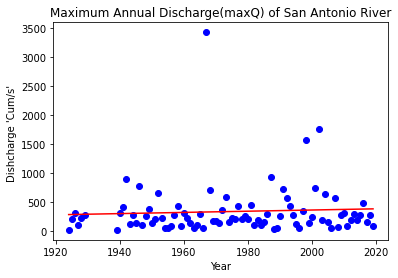

In [15]:
print(f"Coefficient: {round(maxQ_history.coef_[0],3)}")
print(f"Intercept: {round(maxQ_history.intercept_,3)}")

# Scatter-Line Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Maximum Annual Discharge(maxQ) of San Antonio River")
plt.xlabel("Year")
plt.ylabel("Dishcharge 'Cum/s' ")
plt.savefig(f'maxQ_Curve.png', dpi=150)
plt.show()

In [16]:
'''
Interactive Plot showing the actual maxQ and predicted maxQ using LR in the given year
Format: (Actual, Predicted)
         Year
'''
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', text=X[:,0]))
fig.update_layout(title_text = "Maximum Annual Discharge")
fig.show()

In [17]:
# Saving the Actual and Predicted Values in a CSV File
df = pd.DataFrame()
df["Year"] = X.flatten().astype(int)
df["Actual maxQ"] = np.round(y, 3)
df["Predicted maxQ"] = np.round(y_pred, 3)
df.to_csv("maxQ Actual vs Predicted.csv", index=False)

#Linear Regression Analysis with respect to Minimum Annual Discharge (minQ)

In [18]:
# Processing the dataset with respect to minQ
minQ = dataset.resample('Y', on='Date').min().reset_index(drop="True")
minQ['Date'] = pd.DatetimeIndex(minQ['Date']).year
minQ.rename(columns = {"Date": "Year"}, inplace = True)
minQ = minQ.dropna()

In [19]:
# Splitting into dependent(y) and Independent(X) variables
X, y = minQ.iloc[:,0].values, minQ.iloc[:,1].values
X = np.expand_dims(X, axis=1)

In [20]:
# Using the scikit-learn Linear Regression model to predict the values
minQ_LR_model = LinearRegression()
minQ_history = minQ_LR_model.fit(X, y)
y_pred = minQ_LR_model.predict(X)

Coefficient: 0.028
Intercept: -50.225


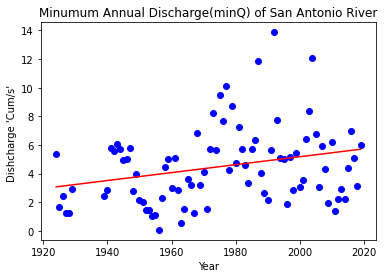

In [21]:
print(f"Coefficient: {round(minQ_history.coef_[0],3)}")
print(f"Intercept: {round(minQ_history.intercept_,3)}")

# Scatter-Line Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Minumum Annual Discharge(minQ) of San Antonio River")
plt.xlabel("Year")
plt.ylabel("Dishcharge 'Cum/s' ")
plt.savefig(f'minQ_Curve.png', dpi=150)
plt.show()

In [22]:
'''
Interactive Plot showing the actual MQ and predicted MQ using LR in the given year
Format: (Actual, Predicted)
         Year
'''
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', text=X[:,0]))
fig.update_layout(title_text = "LR")
fig.show()

In [23]:
# Saving the Actual and Predicted Values in a CSV File
df = pd.DataFrame()
df["Year"] = X.flatten().astype(int)
df["Actual minQ"] = np.round(y, 3)
df["Predicted minQ"] = np.round(y_pred, 3)
df.to_csv("minQ Actual vs Predicted.csv", index=False)